In [1]:
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import itertools

In [61]:
# Z_dict = {}
# G_list = [2,4]
# I_list = [2,10]
# M = 50
# J = 100
# for G in G_list:
#     for I in I_list: 
#         # read pickle
#         with open(f"Z_instances/Z_instance_G{G}_I{I}_M{M}_J{J}_seed{0}_sequence.pickle", 'rb') as f:
#             data = np.array(pickle.load(f))
#             # flatten the last two dimensions out of four dimension
#         data = data[:,:,:-1,:-1]
#         data = data.reshape((data.shape[0], data.shape[1] , data.shape[2]*data.shape[3]))
#             # Z = np.array([Z[i][:-1,-1:].flatten() for i in range(len(Z))])
#         Z_dict[G,I] = data

In [2]:
Z_dict = {}
G_list = [2,4]
I_list = [2,10]
M = 50
J = 100
step_size = 100
samples = 10000
seed_list = [s for s in range(20)]
for G in G_list:
    for I in I_list: 
        Z_dict[G,I] = []
        for s in seed_list:
            # read pickle
            # _step{step_size}_S{samples}_seed{seed}_sequence
            with open(f"Z_instances/Z_instance_G{G}_I{I}_M{M}_J{J}_step{step_size}_S{samples}_seed{s}_sequence.pickle", 'rb') as f:
                data = np.array(pickle.load(f))
                # flatten the last two dimensions out of four dimension
            data = data[:,:,:-1,:-1]
            data = data.reshape((data.shape[0], data.shape[1] , data.shape[2]*data.shape[3]))
                # Z = np.array([Z[i][:-1,-1:].flatten() for i in range(len(Z))])
            for d in data:
                Z_dict[G,I].append(d)
        Z_dict[G,I] = np.array(Z_dict[G,I])

In [3]:
S_lim = 100
step_size = [i*100 for i in range(1,S_lim + 1)]
proms = {}
for idx, (G,I) in enumerate(itertools.product(G_list, I_list)):
    Z = Z_dict[G,I]
    proms[G,I] = np.zeros((S_lim, Z.shape[0]))  
    for m, Z_s in enumerate(Z):    
        for s in range(S_lim):
            # Z_vec = np.array([Z_s[i][:-1,-1:].flatten() for i in range(len(Z_s))])
            proms[G,I][s,m] = np.mean([np.abs(np.corrcoef(Z_s[:-(s+1),i], Z_s[(s+1):,i])[0,1]) for i in range(Z_s.shape[1])])
            # check if nan
            # print('step_size = ', s*100, '\tprom = ', prom)
    proms[G,I] = np.nanmean(proms[G,I], axis = 1)

C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


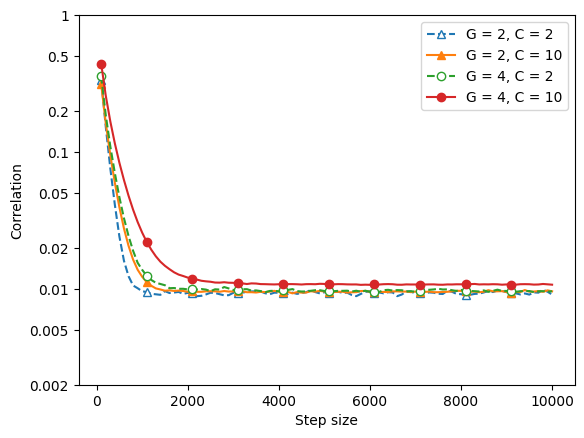

In [5]:
# line_styles = ['-', '--', '-.', ':']
# marker_styles = ['o', 's', 'D', '^']

# line_styles = ['-', '-.', ':', '--']
line_styles = ['--', '-']# ':', '--']
marker_styles = ['^','^','o','o']
# fill_styles = ['full', 'none', 'none', 'full']
fill_styles = [None]
markerface_colors = ['white', None]

for idx, (G,I) in enumerate(itertools.product(G_list, I_list)):
    # print('G = ',G,'I = ',I,'\t',step_size[np.min(np.argwhere(proms[G,I]< 0.01))])
    line_style = line_styles[idx % len(line_styles)]
    marker_style = marker_styles[idx % len(marker_styles)]
    fillstyle = fill_styles[idx % len(fill_styles)]
    markerfacecolor = markerface_colors[idx % len(markerface_colors)]
    ### Put markers in 500, 1000...
    plt.plot(step_size, np.log10(proms[G,I]), label = f'G = {G}, C = {I}', linestyle = line_style, 
        marker = marker_style, markersize = 6, fillstyle = fillstyle, markevery=10, markerfacecolor = markerfacecolor) # legend as the english version
        # for i in range(Z_vec.shape[1]):
        #     prom.append(np.corrcoef(Z_vec[:-s,i], Z_vec[s:,i])[0,1])
        # print(np.mean(prom))
plt.legend()
# draw light dotted line at 0
# plt.axhline(y=0, color='gray', linestyle='--')
# add axis names
plt.xlabel('Step size')
plt.ylabel('Correlation')
# plt.ylim(0,0.15)


# Customize y-axis ticks and labels
values_to_show = [1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002]
y_ticks = [np.log10(v) for v in values_to_show]  # Corresponding to [0.1, 0.3, 1, 3.2, 10]
y_ticklabels = [str(v) for v in values_to_show]
plt.yticks(y_ticks, y_ticklabels)

#save fig
plt.savefig(f'images/corr_graph_v2.pdf', bbox_inches='tight')

# plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.show()

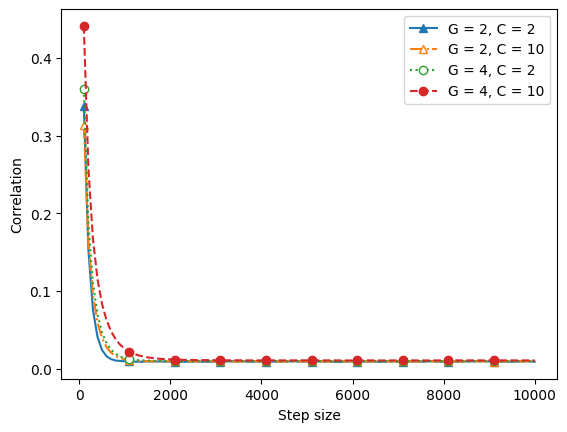

In [25]:
# line_styles = ['-', '--', '-.', ':']
# marker_styles = ['o', 's', 'D', '^']

line_styles = ['-', '-.', ':', '--']
marker_styles = ['^','^','o','o']
# fill_styles = ['full', 'none', 'none', 'full']
fill_styles = [None]
markerface_colors = [None, 'white', 'white', None]

for idx, (G,I) in enumerate(itertools.product(G_list, I_list)):
    # print('G = ',G,'I = ',I,'\t',step_size[np.min(np.argwhere(proms[G,I]< 0.01))])
    line_style = line_styles[idx % len(line_styles)]
    marker_style = marker_styles[idx % len(marker_styles)]
    fillstyle = fill_styles[idx % len(fill_styles)]
    markerfacecolor = markerface_colors[idx % len(markerface_colors)]
    plt.plot(step_size, proms[G,I], label = f'G = {G}, C = {I}', linestyle = line_style, 
        marker = marker_style, markersize = 6, fillstyle = fillstyle, markevery=10, markerfacecolor = markerfacecolor) # legend as the english version
        # for i in range(Z_vec.shape[1]):
        #     prom.append(np.corrcoef(Z_vec[:-s,i], Z_vec[s:,i])[0,1])
        # print(np.mean(prom))
plt.legend()
# draw light dotted line at 0
# plt.axhline(y=0, color='gray', linestyle='--')
# add axis names
plt.xlabel('Step size')
plt.ylabel('Correlation')
# plt.ylim(0,0.15)


# Customize y-axis ticks and labels
# values_to_show = [1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002]
# y_ticks = [np.log10(v) for v in values_to_show]  # Corresponding to [0.1, 0.3, 1, 3.2, 10]
# y_ticklabels = [str(v) for v in values_to_show]
# plt.yticks(y_ticks, y_ticklabels)

# plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.show()

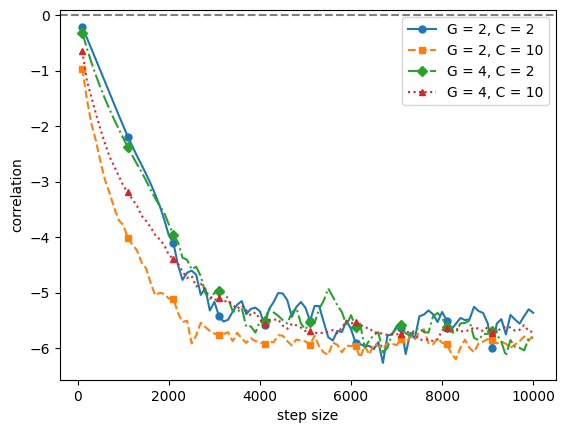

In [34]:
S_lim = 100
step_size = [i*100 for i in range(1,S_lim + 1)]
for idx, (G,I) in enumerate(itertools.product(G_list, I_list)):
    Z = Z_dict[G,I]
    proms = np.zeros((S_lim, Z.shape[0]))  
    for m, Z_s in enumerate(Z):    
        for s in range(S_lim):
            # Z_vec = np.array([Z_s[i][:-1,-1:].flatten() for i in range(len(Z_s))])
            proms[s,m] = np.mean([np.log(np.abs(np.corrcoef(Z_s[:-(s+1),i], Z_s[(s+1):,i]))[0,1]) for i in range(Z_s.shape[1])])
            # print('step_size = ', s*100, '\tprom = ', prom)
    proms = np.mean(proms, axis = 1)
    line_style = line_styles[idx % len(line_styles)]
    marker_style = marker_styles[idx % len(marker_styles)]
    
    plt.plot(step_size, proms, label = f'G = {G}, C = {I}', linestyle = line_style, marker = marker_style, markersize = 5, markevery=10) # legend as the english version
        # for i in range(Z_vec.shape[1]):
        #     prom.append(np.corrcoef(Z_vec[:-s,i], Z_vec[s:,i])[0,1])
        # print(np.mean(prom))
plt.legend()
# draw light dotted line at 0
plt.axhline(y=0, color='gray', linestyle='--')
# add axis names
plt.xlabel('step size')
plt.ylabel('correlation')

# plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.show()